In [65]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector

In [66]:
# file csv to panda

nom_du_fichier_csv = '/Users/marche/Documents/Centrale 3A/Apprentissage_Automatique_Project/Python_files/csv_files/train_bdd_clean.csv'
data = pd.read_csv(nom_du_fichier_csv)

In [67]:
#choose here the label you want to train for among the following list;["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"]:

label = "prct_cause_gestion_trafic"


data_prct = (
    data.copy()
        .drop(
            ["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"],
            axis=1,
        )
    )

y = data[label]
X = data_prct

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Créer la pipeline pour la régression linéaire
linear_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Vous pouvez omettre cette étape si elle n'est pas nécessaire
    ('linear_regression', LinearRegression())  # Régression linéaire
])

In [69]:
# Créer la pipeline pour la régression Random Forest
random_forest_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [70]:
# Créer la pipeline pour la Support Vector Regression (SVR)
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])


In [71]:
# Créer la pipeline pour les K-plus proches voisins (K-NN) en régression
knn_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))  # K-plus proches voisins en régression avec 5 voisins
])

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import tensorflow as tf

# Créez la pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle
    ('mlp', MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam'))  # Réseau de neurones
])

# Entraînez le modèle avec la pipeline
pipeline.fit(X_train, y_train)

# Faites des prédictions
y_pred = pipeline.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
# Entraîner les modèles avec les différentes pipelines

linear_regression_pipeline.fit(X_train, y_train)
random_forest_regression_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)
knn_regression_pipeline.fit(X_train, y_train)
pipeline.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp', MLPRegressor(hidden_layer_sizes=(50, 25)))])

In [74]:
# Évaluer la performance des modèles de régression
linear_regression_predictions = linear_regression_pipeline.predict(X_test)
mse_linear_regression = mean_squared_error(y_test, linear_regression_predictions)
print(f"Erreur quadratique moyenne (MSE) de la régression linéaire : {mse_linear_regression:.2f}")

random_forest_mse = mean_squared_error(y_test, random_forest_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {random_forest_mse:.2f}")

svr_mse = mean_squared_error(y_test, svr_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle SVR : {svr_mse:.2f}")

knn_mse = mean_squared_error(y_test, knn_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : {knn_mse:.2f}")

nn_mse = mean_squared_error(y_test, pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle nn : {nn_mse:.2f}")

Erreur quadratique moyenne (MSE) de la régression linéaire : 213.77
Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 175.02
Erreur quadratique moyenne (MSE) du modèle SVR : 235.14
Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : 252.12
Erreur quadratique moyenne (MSE) du modèle nn : 248.65


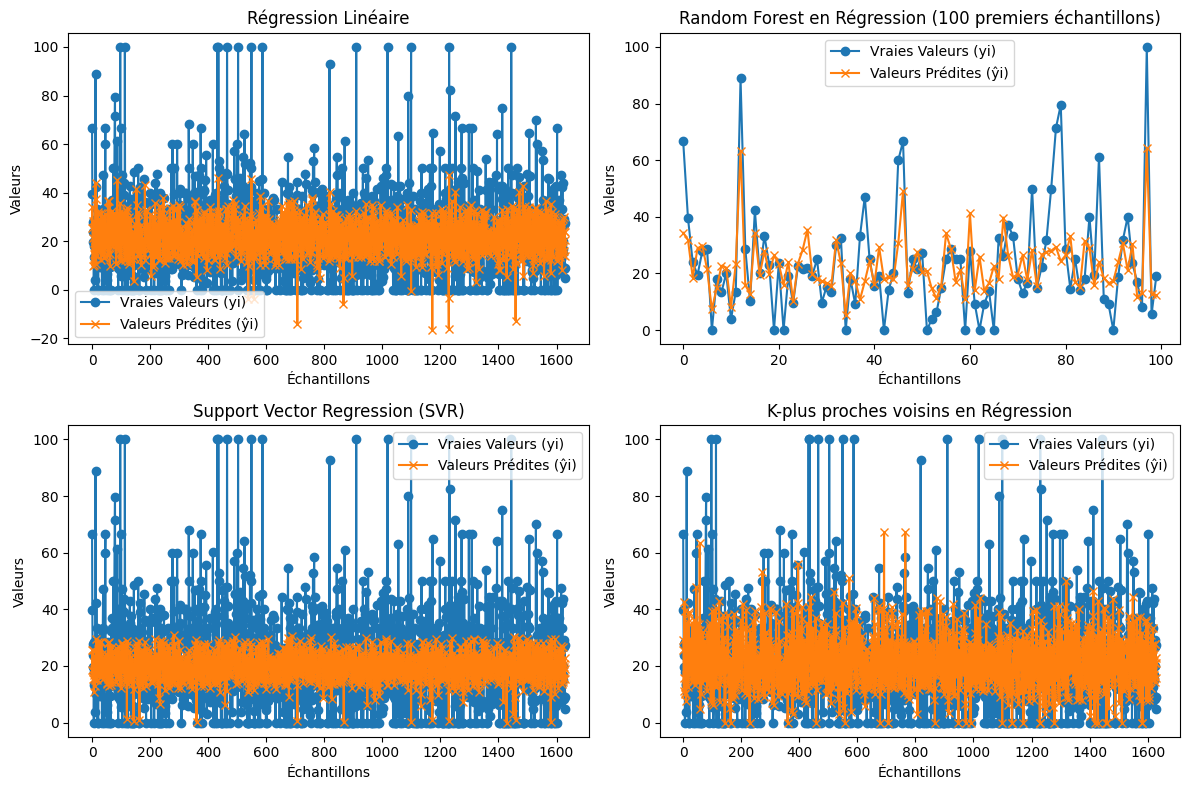

In [75]:
# Prédire les valeurs pour chaque modèle
linear_regression_predictions = linear_regression_pipeline.predict(X_test)
random_forest_predictions = random_forest_regression_pipeline.predict(X_test)
svr_predictions = svr_pipeline.predict(X_test)
knn_predictions = knn_regression_pipeline.predict(X_test)

# Tracer les courbes yi vs ŷi pour chaque modèle
plt.figure(figsize=(12, 8))

# Modèle de régression linéaire
plt.subplot(221)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), linear_regression_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Régression Linéaire")
plt.legend()

# Modèle Random Forest en régression
#plt.subplot(222)
#plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
#plt.plot(np.arange(len(y_test)), random_forest_predictions, label="Valeurs Prédites (ŷi)", marker='x')
#plt.xlabel("Échantillons")
#plt.ylabel("Valeurs")
#plt.title("Random Forest en Régression")
#plt.legend()

# Modèle Random Forest en régression
plt.subplot(222)
plt.plot(np.arange(100), y_test[:100], label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(100), random_forest_predictions[:100], label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Random Forest en Régression (100 premiers échantillons)")
plt.legend()

# Modèle SVR
plt.subplot(223)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), svr_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Support Vector Regression (SVR)")
plt.legend()

# Modèle K-plus proches voisins en régression
plt.subplot(224)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), knn_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("K-plus proches voisins en Régression")
plt.legend()

plt.tight_layout()
plt.show()

In [76]:
def passe():
    # Create SequentialFeatureSelector for Random Forest
    sfs = SequentialFeatureSelector(random_forest_regression_pipeline.named_steps['random_forest'],
                                    k_features='best',  # Set the number of features you want to select
                                    forward=True,
                                    floating=False,
                                    verbose=2,
                                    scoring='neg_mean_squared_error',  # Use negative MSE for feature selection
                                    cv=None)

    # Perform feature selection
    sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_feature_indices = sfs.k_feature_idx_

    # Transform the training and test data with the selected features
    X_train_selected = X_train[:, selected_feature_indices]
    X_test_selected = X_test[:, selected_feature_indices]

    # Train the Random Forest model on the data with selected features
    random_forest_regression_pipeline.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = random_forest_regression_pipeline.predict(X_test_selected)

    # Evaluate the performance with MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE) on selected features: {mse:.2f}")



    #pb: this is way to long. (134 x 135)/2 iterations = 9045 iterations

Variance expliquée par chaque composante principale :
[0.03835422 0.03147935 0.03018917 0.02059551 0.02014047 0.01673341
 0.01472205 0.01455788 0.01424037 0.01371492 0.0127142  0.01233571
 0.01189425 0.01133891 0.01069883 0.01050239 0.0100929  0.00943214
 0.00875743 0.00852783]
Composantes principales :
[[-0.13571667  0.30130101  0.06377075 ... -0.01506339 -0.00966902
  -0.04326632]
 [ 0.33140116 -0.18356243 -0.07059234 ... -0.02717731 -0.0395839
   0.03125075]
 [ 0.15083242  0.09962113  0.00732851 ...  0.0620787  -0.00727854
   0.02930771]
 ...
 [ 0.00680577 -0.05141746  0.00672509 ... -0.00343681 -0.09138092
  -0.00520099]
 [ 0.00787994 -0.09220844 -0.22041001 ... -0.01794713 -0.00513017
  -0.02375674]
 [-0.04923239  0.0587841   0.00338859 ... -0.0309026  -0.15697291
  -0.05171209]]


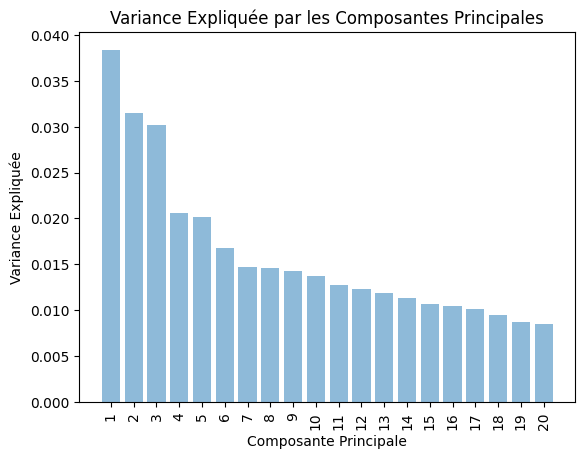

In [77]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# mise à l'échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=20)

# Ajustez et transformez les données
X_pca = pca.fit_transform(X_scaled)

# Les données ont maintenant été réduites en 2 composantes principales (ou le nombre que vous avez spécifié)

# composantes principales et variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)


principal_components = pca.components_
print("Composantes principales :")
print(principal_components)




# graphique à barres pour afficher les variances expliquées
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Composante Principale')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée par les Composantes Principales')
plt.xticks(range(1, len(explained_variance) + 1))
plt.xticks(rotation=90)
plt.show()

In [78]:


# Créez la pipeline avec la standardisation
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle des caractéristiques
    ('pca', PCA(n_components=30)),  # PCA avec le nombre de composantes que vous souhaitez
    ('regressor', RandomForestRegressor())
])

# Entraîner les modèles avec les différentes pipelines

pca_pipeline.fit(X_train, y_train)

random_forest_mse_pca = mean_squared_error(y_test, pca_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {random_forest_mse_pca:.2f}")

#on a une moins bonne mse que sans pca

Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 237.16


In [79]:
correlation_matrix = X.corrwith(y)

pd.set_option('display.max_rows', None)
# Afficher la matrice de corrélation
abs_mat = correlation_matrix.abs()

sorted_correlation = abs_mat.sort_values(ascending=False)

print(sorted_correlation)


ARRIVEE_PARIS MONTPARNASSE                0.187164
Longitude_depart                          0.122999
national_service                          0.109501
annee                                     0.101507
nb_de_voies_depart                        0.100826
Distance (km)                             0.100286
DEPART_PARIS EST                          0.089236
Longitude_arrivee                         0.086242
DEPART_MARSEILLE ST CHARLES               0.081075
ARRIVEE_MADRID                            0.076220
ARRIVEE_STUTTGART                         0.067749
retard_moyen_arrivee                      0.067615
ARRIVEE_PARIS NORD                        0.063833
DEPART_LE MANS                            0.063623
DEPART_POITIERS                           0.060101
ARRIVEE_TOURCOING                         0.059020
nb_de_voies_arrivee                       0.058869
DEPART_STUTTGART                          0.057998
ARRIVEE_MARSEILLE ST CHARLES              0.056205
nb_train_depart_retard         

In [80]:
from sklearn.model_selection import learning_curve

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=random_forest_regression_pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV



# Définissez une grille d'hyperparamètres que vous souhaitez tester
param_grid = {
    'random_forest__n_estimators': [10, 50, 100],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}


model = random_forest_regression_pipeline
# Créez l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Effectuez la recherche sur grille en ajustant le modèle aux données
grid_search.fit(X, y)

# Obtenez les meilleurs hyperparamètres et la meilleure précision
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Imprimez les résultats
print("Meilleurs hyperparamètres:", best_params)
print("Meilleure précision:", best_accuracy)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type

Meilleurs hyperparamètres: {'random_forest__max_depth': None, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 10}
Meilleure précision: nan


In [82]:
from xgboost import XGBRegressor

# Créez la pipeline
XGB_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle (si nécessaire)
    ('xgb', XGBRegressor(objective='reg:squarederror'))  # Modèle XGBoost pour la régression
])

# Entraînez le modèle avec la pipeline
XGB_pipeline.fit(X_train, y_train)

# Faites des prédictions
y_pred = XGB_pipeline.predict(X_test)

XGB_mse = mean_squared_error(y_test, XGB_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle XGB : {XGB_mse:.2f}")

Erreur quadratique moyenne (MSE) du modèle XGB : 186.38


In [84]:
from sklearn.feature_selection import SelectKBest, f_regression


# Créez une liste pour stocker les scores
best_scores = []
best_k = None
best_mse = np.inf  # Initialisez le meilleur score à une valeur négative maximale

# Choisissez la plage de valeurs de k à explorer (par exemple, de 1 à nombre_de_features)
for k in range(1, len(X.columns) + 1):
    # Créez la pipeline avec la nouvelle valeur de k
    random_forest_regression_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Étape de mise à l'échelle
        ('feature_selection', SelectKBest(score_func=f_regression, k=k)),  # Sélection des caractéristiques
        ('regressor', RandomForestRegressor())  # Modèle de régression
    ])

    # Entraînez le modèle avec la pipeline
    random_forest_regression_pipeline.fit(X_train, y_train)

   # Évaluez le modèle en calculant la MSE
    y_pred = random_forest_regression_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Mettez à jour la meilleure MSE et la meilleure valeur de k si nécessaire
    if mse < best_mse:
        print(mse)
        best_mse = mse
        best_k = k

# Affichez la meilleure valeur de k et la meilleure MSE
print("Meilleur k:", best_k)
print("Meilleure MSE:", best_mse)



251.3816184347293
243.6259351233869
243.01245107604777
238.35829733083762
237.64354452613375
237.5154445085048
214.36723955317913
210.94237188810501
180.0567079708796
178.09873035082506
177.93777620290555
177.73308788991127
175.8690465412587
175.0202232238372
174.9413270961475
174.62503155013556
174.60358916106748
173.7227660914339
172.59828115081666
172.51139477122067
Meilleur k: 142
Meilleure MSE: 172.51139477122067
